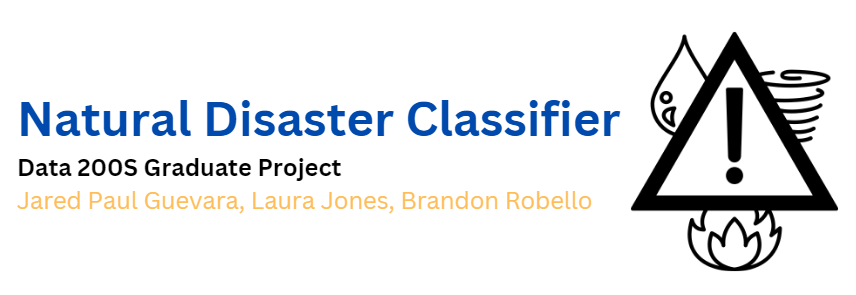


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, ADASYN


In [2]:
def visualize_feature_distribution(feature_df, disaster_type):
    """
    Visualize the distribution of the summary statistics for each dataset.

    Args:
        feature_df (DataFrame): DataFrame where each row is a feature vector and each column is a feature.
    """
    feature_names = feature_df.columns

    for feature_name in feature_names:
        plt.figure(figsize=(10, 6))
        sns.histplot(feature_df[feature_name], kde=True, bins=20)
        plt.title(f'Distribution of {feature_name} of {disaster_type}')
        plt.xlabel(feature_name)
        plt.ylabel('Density')
        plt.show()

def label_dist(disaster, labels):
    # Print statements of min and max
    print(f"Value counts for labels in {disaster} :\n{pd.Series(labels).value_counts().sort_index()}")

    # Create a histogram for label distribution with bins for each label
    plt.hist(labels, bins=[0, 1, 2, 3, 4], align='left', color='green', alpha=0.7)
    plt.title(f'Damage Label Distribution of {disaster}')
    plt.xlabel('Damage Labels')
    plt.ylabel('Frequency')
    plt.xticks([0, 1, 2, 3])  # Set x-ticks to correspond to the discrete labels

    # Adjust the layout
    plt.tight_layout()
    plt.show()

**Observing the training set label distribution:**


`task_B_df` head:


,image_matrix,disaster,label,height,width,aspect_ratio,total_pixels,avg_pixel_int,avg_red_pixel_int,avg_green_pixel_int,...,gabor_11_var,gabor_3_var,gabor_1_var,gabor_10_var,gabor_2_var,gabor_8_var,gabor_0_var,area of red pixels above 85,area of green pixels above 111,area of blue pixels above 102
0,[[[ 58 94 83]\n [ 60 97 86]\n [ 61 98 ...,hurricane-matthew,3,65,54,0.830769,3510,94.020703,75.702279,105.275783,...,0.000122,0.000132,0.001399,0.000019,0.000016,0.000184,0.000149,0.226211,0.290028,0.403419
1,[[[150 177 183]\n [147 174 182]\n [153 180 1...,hurricane-matthew,0,67,105,1.567164,7035,106.040938,88.451599,119.422886,...,0.000073,0.000179,0.003852,0.000005,0.000029,0.000064,0.000160,0.426866,0.460270,0.462118
2,[[[ 59 81 75]\n [ 53 75 69]\n [ 47 68 ...,hurricane-matthew,1,54,56,1.037037,3024,117.725198,111.971561,122.160714,...,0.000342,0.000296,0.005609,0.000076,0.000061,0.000447,0.000344,0.635251,0.510913,0.601852


`X_train'.columns:


Index(['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int',
       'avg_red_pixel_int', 'avg_green_pixel_int', 'avg_blue_pixel_int',
       'lbp_var', 'gabor_7_var', 'gabor_6_var', 'lbp_mean', 'sobel_mean',
       'gabor_5_var', 'gabor_4_var', 'sobel_var', 'gabor_9_var',
       'gabor_11_var', 'gabor_3_var', 'gabor_1_var', 'gabor_10_var',
       'gabor_2_var', 'gabor_8_var', 'gabor_0_var',
       'area of red pixels above 85', 'area of green pixels above 111',
       'area of blue pixels above 102'],
      dtype='object')

Value counts for labels in hurricane-matthew :
label
0    2138
1    4190
2    1217
3    1375
Name: count, dtype: int64


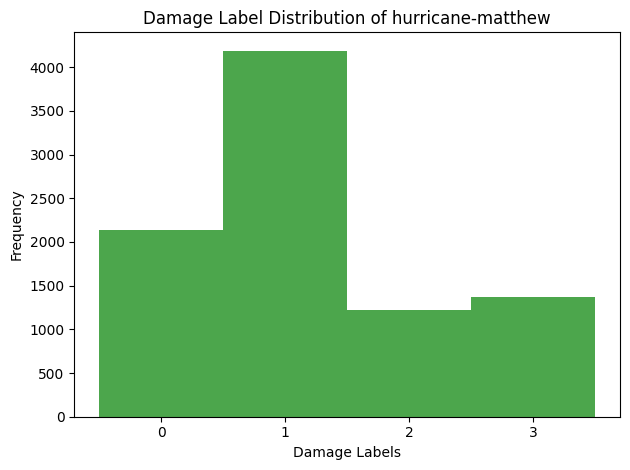

In [3]:
# Save Disaster of interest for task B
disaster = 'hurricane-matthew'

# Get dataset for hurricane-matthew
task_B_df = pd.read_csv('../data/task-data/task-B.csv')

print("`task_B_df` head:")
display(task_B_df.head(3))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(task_B_df.iloc[:,3:], task_B_df.iloc[:,2],
                                                    test_size=0.2, random_state=42)

print("`X_train'.columns:")
display(X_train.columns)

# Visualize Distribution
label_dist(disaster, y_train)

# Random Under Sampler (RUS)


Value counts for labels in hurricane-matthew :
label
0    1217
1    1217
2    1217
3    1217
Name: count, dtype: int64


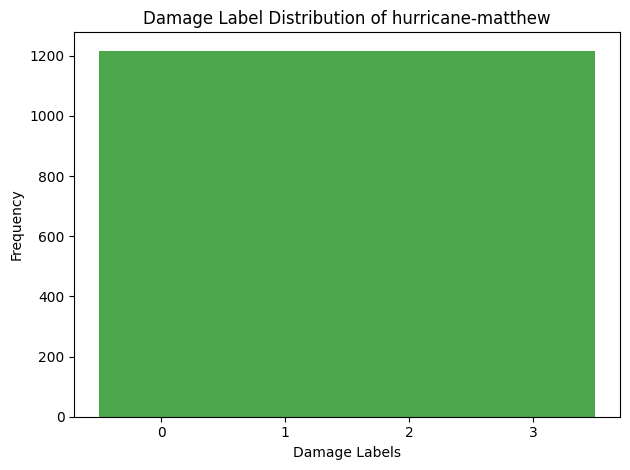

In [4]:
# Initialize the random under-sampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_rus_resampled, y_rus_resampled = rus.fit_resample(X_train, y_train)

# Visualize Distribution
label_dist(disaster, y_rus_resampled)

Accuracy: 0.5091887046167638
              precision    recall  f1-score   support

           0       0.46      0.61      0.52       493
           1       0.68      0.45      0.54      1046
           2       0.26      0.37      0.31       327
           3       0.57      0.68      0.62       365

    accuracy                           0.51      2231
   macro avg       0.49      0.53      0.50      2231
weighted avg       0.55      0.51      0.52      2231



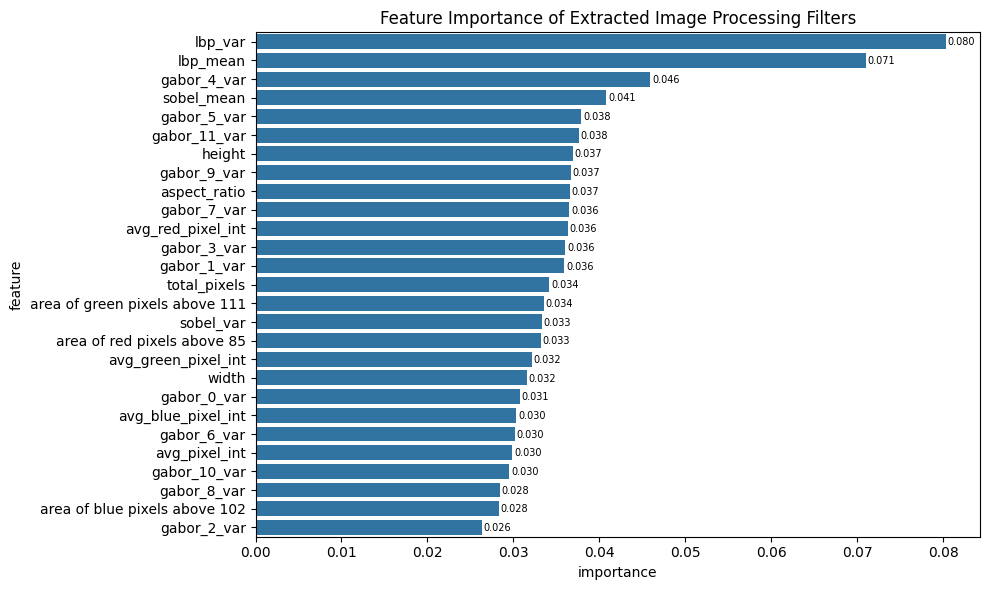

In [5]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_rus_resampled, y_rus_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Convert numeric damage_labels to strings for classification report
dmg_labels = [str(dl) for dl in set(y_test)]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=dmg_labels))

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the importances into a more interpretable form
feature_importances = pd.DataFrame({
    'feature': X_rus_resampled.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', (p.get_width()+0.0002, p.get_y()+0.6), fontsize=7)
plt.title('Feature Importance of Extracted Image Processing Filters')
plt.tight_layout()
plt.show()

# Random Over Sampler (ROS)


Value counts for labels in hurricane-matthew :
label
0    4190
1    4190
2    4190
3    4190
Name: count, dtype: int64


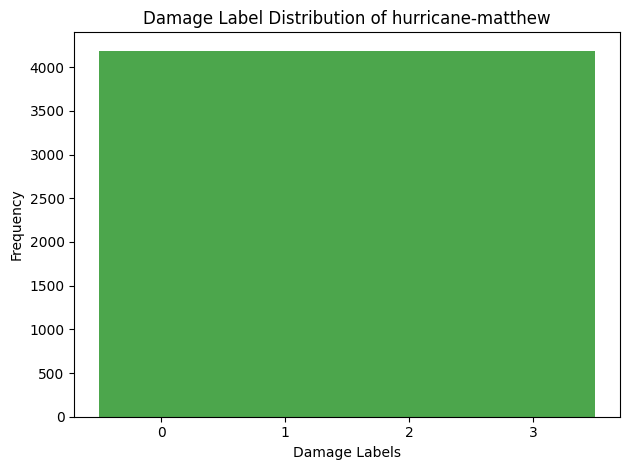

In [6]:
### ROS
from imblearn.over_sampling import RandomOverSampler

# Initialize the over-sampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_ros_resampled, y_ros_resampled = ros.fit_resample(X_train, y_train)

# Visualize Distribution
label_dist(disaster, y_ros_resampled)

Accuracy: 0.5656656207978485
              precision    recall  f1-score   support

           0       0.48      0.53      0.50       493
           1       0.64      0.68      0.66      1046
           2       0.30      0.18      0.22       327
           3       0.61      0.62      0.62       365

    accuracy                           0.57      2231
   macro avg       0.51      0.50      0.50      2231
weighted avg       0.55      0.57      0.55      2231



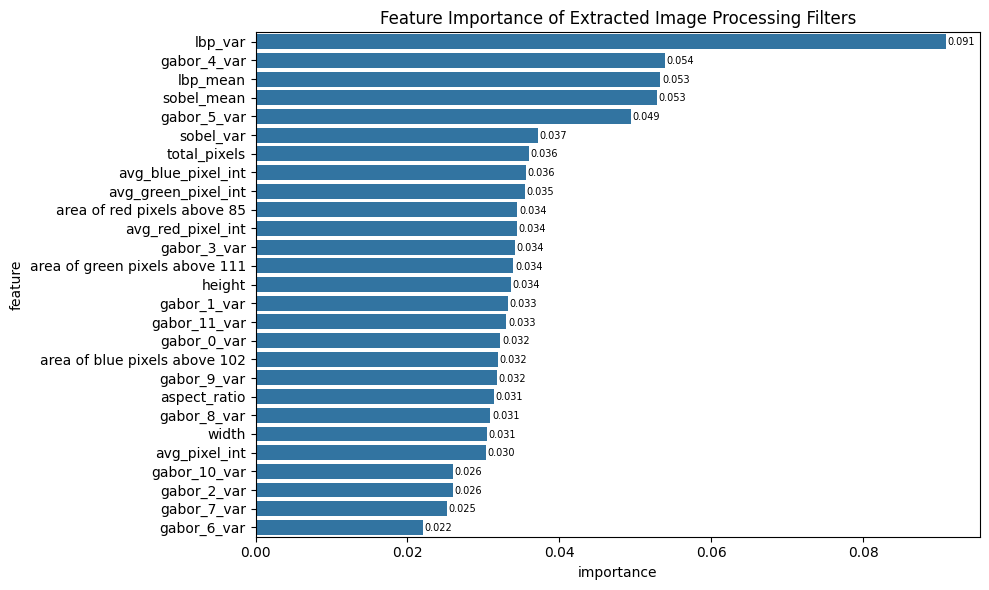

In [7]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the classifier
rf_classifier.fit(X_ros_resampled, y_ros_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Convert numeric damage_labels to strings for classification report
dmg_labels = [str(dl) for dl in set(y_test)]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=dmg_labels))

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the importances into a more interpretable form
feature_importances = pd.DataFrame({
    'feature': X_rus_resampled.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', (p.get_width()+0.0002, p.get_y()+0.6), fontsize=7)
plt.title('Feature Importance of Extracted Image Processing Filters')
plt.tight_layout()
plt.show()

# ADASYN


Value counts for labels in hurricane-matthew :
label
0    4208
1    4190
2    4200
3    4344
Name: count, dtype: int64


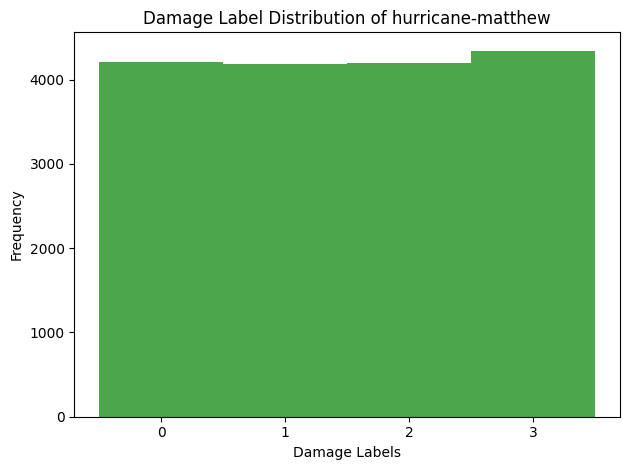

In [8]:
# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Resample the dataset using ADASYN
X_adasyn_resampled, y_adasyn_resampled = adasyn.fit_resample(X_train, y_train)

# Visualize Distribution
label_dist(disaster, y_adasyn_resampled)

Accuracy: 0.5719408337068579
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       493
           1       0.68      0.61      0.64      1046
           2       0.34      0.35      0.34       327
           3       0.60      0.70      0.64       365

    accuracy                           0.57      2231
   macro avg       0.53      0.55      0.54      2231
weighted avg       0.58      0.57      0.57      2231



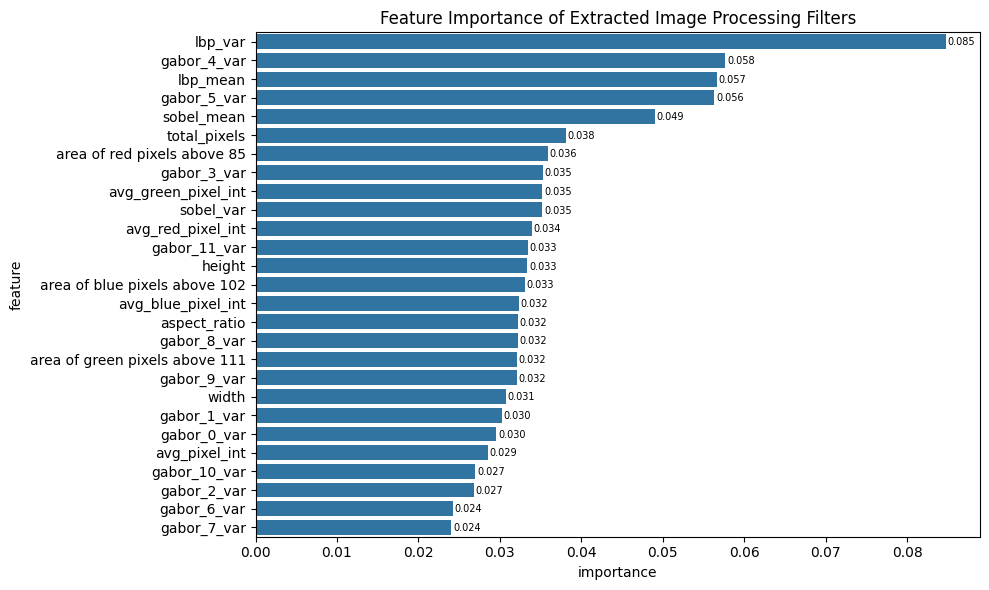

In [9]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_adasyn_resampled, y_adasyn_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Convert numeric damage_labels to strings for classification report
dmg_labels = [str(dl) for dl in set(y_adasyn_resampled)]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=dmg_labels))

# Get feature importances
importances = rf_classifier.feature_importances_

# Convert the importances into a more interpretable form
feature_importances = pd.DataFrame({
    'feature': X_adasyn_resampled.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=feature_importances)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', (p.get_width()+0.0002, p.get_y()+0.6), fontsize=7)
plt.title('Feature Importance of Extracted Image Processing Filters')
plt.tight_layout()
plt.show()

# Modeling - Task B: Classifying `hurricane-matthew` Disaster Levels


In [13]:
# Create a summary dataframe that compares between the different sampling techniques
sampling_comps = pd.DataFrame({'techniques' : ['original', 'RUS', 'ROS', 'ADASYN'],
                               'accuracy' : ['n/a', '0.515', '0.548', '0.564'],
                               '0' : [2138, 1217, 4190, 4214],
                               '1' : [4190, 1217, 4190, 4190],
                               '2' : [1217, 1217, 4190, 4226],
                               '3' : [1375, 1217, 4190, 4377]})
display(sampling_comps)

,techniques,accuracy,0,1,2,3
0,original,n/a,2138,4190,1217,1375
1,RUS,0.515,1217,1217,1217,1217
2,ROS,0.548,4190,4190,4190,4190
3,ADASYN,0.564,4214,4190,4226,4377


According to the results, ADASYN had the highest accuracy, while maintaining the largest number of samples to work with. We'll go ahead with ADASYN as our remedy to the imbalanced classes and train our models with it.


Dataframe shape before over-sampling: (11151, 27)
Dataframe shape after over-sampling: (21229, 27)
Value counts for labels in hurricane-matthew :
label
0    5170
1    5236
2    5296
3    5527
Name: count, dtype: int64


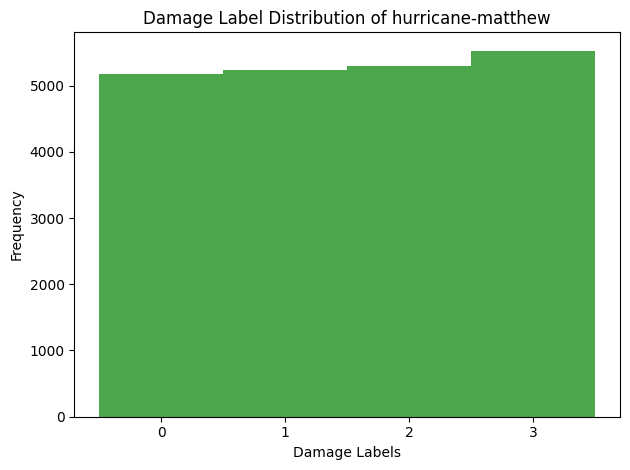

Top five rows of X:


,height,width,aspect_ratio,total_pixels,avg_pixel_int,avg_red_pixel_int,avg_green_pixel_int,avg_blue_pixel_int,lbp_var,gabor_7_var,...,gabor_11_var,gabor_3_var,gabor_1_var,gabor_10_var,gabor_2_var,gabor_8_var,gabor_0_var,area of red pixels above 85,area of green pixels above 111,area of blue pixels above 102
0,65,54,0.830769,3510,94.020703,75.702279,105.275783,101.084046,9.486493,1.449397e-05,...,0.000122,0.000132,0.001399,0.000019,0.000016,0.000184,0.000149,0.226211,0.290028,0.403419
1,67,105,1.567164,7035,106.040938,88.451599,119.422886,110.248330,6.510007,2.284809e-07,...,0.000073,0.000179,0.003852,0.000005,0.000029,0.000064,0.000160,0.426866,0.460270,0.462118
2,54,56,1.037037,3024,117.725198,111.971561,122.160714,119.043320,9.884637,2.858254e-05,...,0.000342,0.000296,0.005609,0.000076,0.000061,0.000447,0.000344,0.635251,0.510913,0.601852
3,114,124,1.087719,14136,117.736347,96.979697,128.503962,127.725382,6.942043,1.897601e-07,...,0.000048,0.000098,0.002696,0.000002,0.000018,0.000039,0.000100,0.549377,0.803339,0.797538
4,58,51,0.879310,2958,97.423372,87.179851,108.778905,96.311359,4.783794,5.867417e-07,...,0.000189,0.000206,0.003177,0.000013,0.000021,0.000112,0.000153,0.419202,0.390805,0.350913


In [14]:
# Show before and after changes to dataframe
print(f"Dataframe shape before over-sampling: {task_B_df.iloc[:, 3:].shape}")
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(task_B_df.iloc[:, 3:], task_B_df.iloc[:, 2])
print(f"Dataframe shape after over-sampling: {X.shape}")
label_dist(disaster, y)

print(f'Top five rows of X:')
display(X.head())

In [17]:
# LinearSVC Feature Selection (runtime: ~8sec)
def svc_feature_selection(features):
  feature_scores = []

  for combo in features:
    X_train, X_val, y_train, y_val = train_test_split(X[combo], y, test_size=0.2, random_state=42)
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC())])
    feature_scores.append((combo, pipe.fit(X_train, y_train).score(X_train, y_train)))

  return feature_scores

feature_combinations = [X.columns[0:8].to_list(), X.columns[8:24].to_list(), X.columns[24:].to_list(), X.columns[0:24].to_list(), X.columns[8:].to_list(), 
                        X.columns[0:8].to_list()+X.columns[24:].to_list(), X.columns.to_list()]

print(f'Best training score among feature combinations: {max(svc_feature_selection(feature_combinations))[1]:.3f}')

svc_best_params = max(svc_feature_selection(feature_combinations))[0]
print(f'Best parameters for LinearSVC: {svc_best_params}')

Best training score among feature combinations: 0.572
Best parameters for LinearSVC: ['lbp_var', 'gabor_7_var', 'gabor_6_var', 'lbp_mean', 'sobel_mean', 'gabor_5_var', 'gabor_4_var', 'sobel_var', 'gabor_9_var', 'gabor_11_var', 'gabor_3_var', 'gabor_1_var', 'gabor_10_var', 'gabor_2_var', 'gabor_8_var', 'gabor_0_var', 'area of red pixels above 85', 'area of green pixels above 111', 'area of blue pixels above 102']


In [18]:
# LinearSVC Grid Search (Runtime: ~20min)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', LinearSVC())])

param_grid = {'svc__C' : [0.01, 0.1, 1, 10, 100],
              'svc__max_iter' : [500, 1000, 2000, 3000],
              'svc__penalty' : ['l1', 'l2']}

best_X = X[svc_best_params]

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(best_X, y)

print(f'Best score: {grid_search.best_score_:.3f}')
print(f'Best hyperparameters for LinearSVC model: {grid_search.best_params_}')

Best score: 0.574
Best hyperparameters for LinearSVC model: {'svc__C': 10, 'svc__max_iter': 3000, 'svc__penalty': 'l2'}


In [19]:
optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(C=1, max_iter=3000))]) # default penalty is 'l2'

X_train, X_val, y_train, y_val = train_test_split(best_X, y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
svc_train_preds = optimal_pipe.predict(X_train)
svc_train_score = optimal_pipe.score(X_train, y_train)
svc_val_preds = optimal_pipe.predict(X_val)
svc_val_score = optimal_pipe.score(X_val, y_val)
svc_cv_score = cross_val_score(optimal_pipe, best_X, y, cv=10)
print(f'Initial training score: {svc_train_score}')
print(f'Initial validation score: {svc_val_score}')
print(f'Average cross-validation score across 10 folds: {svc_cv_score.mean()}')

Initial training score: 0.5707472178060413
Initial validation score: 0.5774846914743288
Average cross-validation score across 10 folds: 0.5730374609933926


              precision    recall  f1-score   support

           0      0.571     0.729     0.640      1022
           1      0.453     0.416     0.433      1049
           2      0.571     0.412     0.479      1061
           3      0.688     0.749     0.717      1114

    accuracy                          0.577      4246
   macro avg      0.571     0.576     0.567      4246
weighted avg      0.572     0.577     0.569      4246



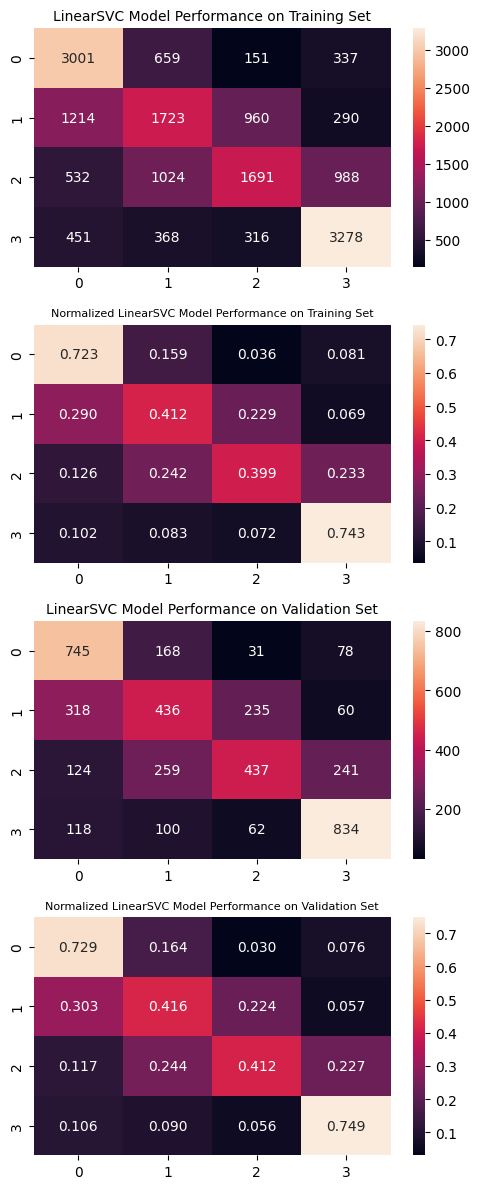

In [20]:
print(classification_report(y_val, svc_val_preds, digits=3))

plt.subplots(figsize=(5,12))

plt.subplot(4, 1, 1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, svc_train_preds), index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.0f', annot=True)
plt.title('LinearSVC Model Performance on Training Set', fontsize=10)

plt.subplot(4, 1, 2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, svc_train_preds, normalize='true'),
                         index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.3f', annot=True)
plt.title('Normalized LinearSVC Model Performance on Training Set', fontsize=8)

plt.subplot(4, 1, 3)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, svc_val_preds), index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.0f', annot=True)
plt.title('LinearSVC Model Performance on Validation Set', fontsize=10)

plt.subplot(4, 1, 4)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, svc_val_preds, normalize='true'),
                         index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.3f', annot=True)
plt.title('Normalized LinearSVC Model Performance on Validation Set', fontsize=8)

plt.tight_layout()
plt.show()

In [22]:
# RandomForestClassifier Feature Selection (runtime: ~8sec)
def rfc_feature_selection(features):
  feature_scores = []

  for combo in features:
    X_train, X_val, y_train, y_val = train_test_split(X[combo], y, test_size=0.2, random_state=42)
    pipe = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier())])
    feature_scores.append((combo, pipe.fit(X_train, y_train).score(X_train, y_train)))

  return feature_scores

feature_combinations = [X.columns[0:8].to_list(), X.columns[8:24].to_list(), X.columns[24:].to_list(), X.columns[0:24].to_list(), X.columns[8:].to_list(), 
                        X.columns[0:8].to_list()+X.columns[24:].to_list(), X.columns.to_list()]

print(f'Best training score among feature combinations: {max(rfc_feature_selection(feature_combinations))[1]:.3f}')

rfc_best_params = max(rfc_feature_selection(feature_combinations))[0]
print(f'Best parameters for RandomForestClassifier: {rfc_best_params}')

Best training score among feature combinations: 1.000
Best parameters for RandomForestClassifier: ['lbp_var', 'gabor_7_var', 'gabor_6_var', 'lbp_mean', 'sobel_mean', 'gabor_5_var', 'gabor_4_var', 'sobel_var', 'gabor_9_var', 'gabor_11_var', 'gabor_3_var', 'gabor_1_var', 'gabor_10_var', 'gabor_2_var', 'gabor_8_var', 'gabor_0_var', 'area of red pixels above 85', 'area of green pixels above 111', 'area of blue pixels above 102']


In [23]:
# RandomForestClassifier Grid Search (runtime: ~8min)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('rfc', RandomForestClassifier(random_state=42))])

param_grid = {'rfc__n_estimators' : [10, 100, 1000],
              'rfc__max_features' : ['sqrt', 'log2', 0.33],
              'rfc__max_depth' : [1, 2, 5, 10]}

best_X = X[rfc_best_params]

grid_search = GridSearchCV(pipe, param_grid, cv=10)
grid_search.fit(best_X, y)

print(f'Best score: {grid_search.best_score_:.3f}')
print(f'Best hyperparameters for RandomForestClassifier model: {grid_search.best_params_}')

Best score: 0.626
Best hyperparameters for RandomForestClassifier model: {'rfc__max_depth': 10, 'rfc__max_features': 0.33, 'rfc__n_estimators': 1000}


In [24]:
optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('rfc', RandomForestClassifier(max_depth=10, max_features=0.33, n_estimators=100, random_state=42))])

X_train, X_val, y_train, y_val = train_test_split(best_X, y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
rfc_train_preds = optimal_pipe.predict(X_train)
rfc_train_score = optimal_pipe.score(X_train, y_train)
rfc_val_preds = optimal_pipe.predict(X_val)
rfc_val_score = optimal_pipe.score(X_val, y_val)
rfc_cv_score = cross_val_score(optimal_pipe, best_X, y, cv=10)
print(f'Initial training score: {rfc_train_score}')
print(f'Initial validation score: {rfc_val_score}')
print(f'Average cross-validation score across 10 folds: {rfc_cv_score.mean()}')

Initial training score: 0.7479832773950421
Initial validation score: 0.6307112576542628
Average cross-validation score across 10 folds: 0.6241003452603615


              precision    recall  f1-score   support

           0      0.645     0.675     0.660      1022
           1      0.577     0.533     0.554      1049
           2      0.566     0.527     0.546      1061
           3      0.713     0.781     0.746      1114

    accuracy                          0.631      4246
   macro avg      0.625     0.629     0.626      4246
weighted avg      0.626     0.631     0.628      4246



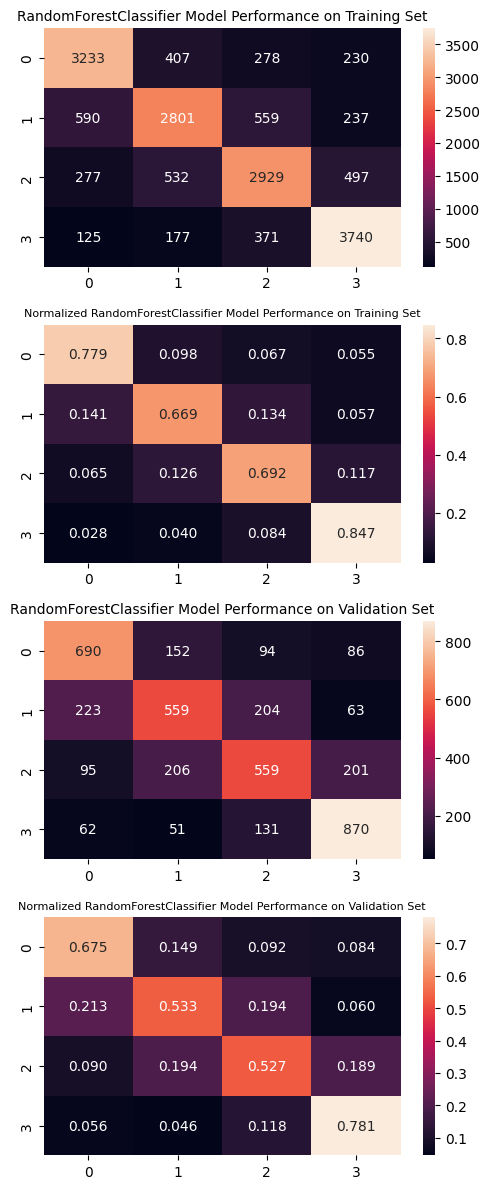

In [25]:
plt.subplots(figsize=(5,12))

print(classification_report(y_val, rfc_val_preds, digits=3))

plt.subplot(4, 1, 1)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, rfc_train_preds), index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.0f', annot=True)
plt.title('RandomForestClassifier Model Performance on Training Set', fontsize=10)

plt.subplot(4, 1, 2)
sns.heatmap(pd.DataFrame(confusion_matrix(y_train, rfc_train_preds, normalize='true'),
                         index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.3f', annot=True)
plt.title('Normalized RandomForestClassifier Model Performance on Training Set', fontsize=8)

plt.subplot(4, 1, 3)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, rfc_val_preds), index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.0f', annot=True)
plt.title('RandomForestClassifier Model Performance on Validation Set', fontsize=10)

plt.subplot(4, 1, 4)
sns.heatmap(pd.DataFrame(confusion_matrix(y_val, rfc_val_preds, normalize='true'),
                         index=[0, 1, 2, 3], columns=[0, 1, 2, 3]), fmt='.3f', annot=True)
plt.title('Normalized RandomForestClassifier Model Performance on Validation Set', fontsize=8)

plt.tight_layout()
plt.show()

In [27]:
print(f'LinearSVC vs. RandomForestClassifier Mean Cross-Validation Scores: {svc_cv_score.mean()} vs. {rfc_cv_score.mean()}')
print(f'LinearSVC vs. RandomForestClassifier Training Scores: {svc_train_score} vs. {rfc_train_score}')
print(f'LinearSVC vs. RandomForestClassifier Validation Scores: {svc_val_score} vs. {rfc_val_score}')

LinearSVC vs. RandomForestClassifier Mean Cross-Validation Scores: 0.5730374609933926 vs. 0.6241003452603615
LinearSVC vs. RandomForestClassifier Training Scores: 0.5707472178060413 vs. 0.7479832773950421
LinearSVC vs. RandomForestClassifier Validation Scores: 0.5774846914743288 vs. 0.6307112576542628


In [26]:
with open('../models/task_B_model.pkl','wb') as f:
    pickle.dump(optimal_pipe,f)